In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.0 MB/s eta 0:00:00


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## When to use what activation function

- All hidden layers generally use the same activation functions. `ReLU` activation function should only be used in the hidden layer for better results.
- `Sigmoid` and `TanH` activation functions should not be utilized in hidden layers due to the vanishing gradient, since they make the model more susceptible to problems during training.
- `Swish` function is used in artificial neural networks having a depth more than 40 layers.
- `Regression` problems should use linear activation functions
- `Binary classification` problems should use the sigmoid activation function
- `Multiclass classification` problems shold use the softmax activation function

Neural network architecture and their usable activation functions,
- `Convolutional Neural Network` (CNN): ReLU activation function
- `Recurrent Neural Network` (RNN): TanH or sigmoid activation functions

Source:

https://www.kdnuggets.com/2022/06/activation-functions-work-deep-learning.html#:~:text=The%20activation%20function%20compares%20the,the%20next%20or%20hidden%20layer.


---
Complex models that handle difficult tasks like medical images analysis should be deep and have a consideral number of layers. Here is a brief definition of how many layers should a model have:

1. *Simple Tasks*: If the task is relatively straightforward (like simple image classification or basic regression tasks), you may only need a few layers. A model with 2-4 layers might be sufficient.

2. *Moderate Complexity Tasks*: For tasks with moderate complexity, such as image recognition or more complex regression, you might use a model with around 5-10 layers. Convolutional Neural Networks (CNNs) often work well with this range for tasks like facial recognition or object detection in images.

3. *Complex Tasks* (e.g., medical imaging, NLP): When dealing with high-dimensional and complex data (like MRI images in healthcare or natural language processing), deeper models are often required. This can range from 20-50 layers in CNNs for image-based tasks or even more in Transformer architectures for text processing tasks.

4. *Very Deep Networks*: State-of-the-art models like ResNet, VGG, and Transformers can have hundreds of layers. These architectures use skip connections or residual blocks to allow effective training of very deep networks without vanishing gradients.

---
## Type of Layers in Deep Learning:


In deep learning, layers are the building blocks of a neural network, and each type has a specific purpose. Here’s an overview of the commonly used layers, including the ones I mentioned:

1. Convolutional Layers (Conv2D)
    - *Purpose*: Primarily used in image data for feature extraction.
    - *Function*: Applies convolution filters to detect patterns in small image patches. These patterns could be edges, textures, or complex shapes at deeper layers.
    - *Typical Use*: Often combined with pooling layers in CNNs for tasks like image classification, object detection, and segmentation.

2. Pooling Layers (MaxPooling2D, AveragePooling2D)
    - *Purpose*: Reduces the spatial dimensions of the feature maps, which lowers the computational load and controls overfitting.
    - *Types*:
      - `MaxPooling`: Retains the maximum value from each region, which captures strong features and preserves important structures.
      - `AveragePooling`: Takes the average of each region, which smoothens the features.
    - *Typical Use*: Often used after convolutional layers to progressively reduce spatial dimensions, focusing on the most salient features.
3. Flatten Layer
    - *Purpose*: Transforms multi-dimensional data (like a feature map from convolutional layers) into a one-dimensional array.
    - *Function*: Prepares data for fully connected layers, which can only accept one-dimensional inputs.
    - *Typical Use*: Often used before Dense layers to switch from feature extraction to classification or regression.
4. Dense Layer (Fully Connected Layer)
    - *Purpose*: Implements high-level reasoning by connecting all neurons from the previous layer to each neuron in the Dense layer.
    - *Function*: Often used at the end of a network for classification or regression, with activation functions like softmax or sigmoid for output probabilities.
    - *Typical Use*: For the final prediction in most models. Works well for both image and non-image data, such as text and tabular data.
5. Dropout Layer
    - *Purpose*: Prevents overfitting by randomly "dropping out" a fraction of neurons during each training iteration.
    - *Function*: Forces the network to learn redundant representations, improving generalization.
    - *Typical Use*: Placed after Dense layers or Conv2D layers, especially when training on smaller datasets.
6. Batch Normalization Layer
    - *Purpose*: Normalizes the input of each layer to improve training stability and speed.
    - *Function*: Reduces the internal covariate shift by standardizing activations, allowing the model to use higher learning rates and often improving accuracy.
    - *Typical Use*: Typically applied after a Conv2D or Dense layer. Common in deeper networks where gradient stability can be an issue.
7. Activation Layer (ReLU, Sigmoid, Softmax)
    - *Purpose*: Adds non-linearity, allowing the network to model complex patterns.
    - *Types*:
      - `ReLU (Rectified Linear Unit)`: Allows positive values and sets negative values to zero, speeding up training. Commonly used in hidden layers.
      - `Sigmoid`: Squashes output to a range between 0 and 1, often used in binary classification problems.
      - `Softmax`: Produces a probability distribution over classes for multi-class classification tasks.
    - *Typical Use*: Each Dense or Conv2D layer is usually followed by an activation function, with ReLU for hidden layers and sigmoid or softmax for the output layer.
8. Resizing and Rescaling Layers
    - *Purpose*: Pre-processes images by resizing them to a standard size or scaling pixel values.
    - *Function*:
      - `Resizing`: Adjusts image dimensions to fit model requirements.
      - `Rescaling`: Normalizes pixel values (e.g., dividing by 255) to make them easier to process for the model.
    - *Typical Use*: Often at the beginning of image-based models to prepare input data.
9. Residual or Skip Connections
    - *Purpose*: Allows the model to "skip" some layers, which helps avoid vanishing gradients in deep networks.
    - *Function*: Adds the output of a previous layer to a deeper layer, maintaining the flow of information.
    - *Typical Use*: Used in deep networks (e.g., ResNet) to ensure gradient stability and improve performance in complex models.
10. Recurrent Layers (e.g., LSTM, GRU)
    - *Purpose*: Captures sequential dependencies, commonly used in time series or text data.
    - *Types*:
      - `LSTM (Long Short-Term Memory)`: Designed to retain information over long sequences.
      - `GRU (Gated Recurrent Unit)`: Similar to LSTM but simpler and faster.
    - *Typical Use*: Often used in tasks like speech recognition, language modeling, and time series forecasting.

In [ ]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers

def build_model():
  inputs = keras.Input(shape=(300, 300, 3)) #this line will adapt images sizes to the values entered here
  # Rescaling Layer: Normalize pixel values for faster training and better convergence.
  x = layers.Rescaling(1./255)(inputs)

  # Convolution and Pooling Blocks: These blocks progressively extract higher-level features.
  #    Start with lower filters and increase them gradually.
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)  # Normalizes activations to improve stability

  #    Intermediate feature extraction with more filters.
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  #    Higher-level feature extraction, increasing the complexity.
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)

  #    Deeper features with even more filters. Dropout layer helps avoid overfitting.
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)  # Dropout layer to mitigate overfitting

  # Converts the 2D feature maps into a 1D vector to feed into dense layers
  # Flatten and Dense Layers
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(256, activation="relu")(x)
  outputs = layers.Dense(3, activation="softmax")(x) # For Multiclass classification problems should use the softmax activation function


  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      loss='categorical_crossentropy',
      optimizer=optimizers.RMSprop(learning_rate=1e-4), # learning rate
      metrics=['accuracy'])
  return model

In [ ]:
m = build_model()
m.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 149, 149, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 73, 73, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 35, 35, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,535,555 (28.75 MB)

 Trainable params: 7,534,595 (28.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# adapt the images size to be the same as the models size
train_folder = '/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/train'
val_folder = '/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/validation'
test_folder = '/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/test'

from keras.utils import image_dataset_from_directory
# shuffle is True by default
# class_mode='binary', better to specify?
train_dataset = image_dataset_from_directory(
    train_folder,
    image_size=(300, 300),
    batch_size=32,
    label_mode='categorical') # changed from binary to categorical to handle 3 labels
validation_dataset = image_dataset_from_directory(
    val_folder,
    image_size=(300, 300),
    batch_size=32,
    label_mode='categorical') # changed from binary to categorical to handle 3 labels
test_dataset = image_dataset_from_directory(
    test_folder,
    image_size=(300, 300),
    batch_size=32,
    shuffle=False,
    label_mode='categorical') # changed from binary to categorical to handle 3 labels

Found 12093 files belonging to 3 classes.
Found 1529 files belonging to 3 classes.
Found 1471 files belonging to 3 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 300, 300, 3)
labels batch shape: (32, 3)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        # Correct the file path to point to your Google Drive directory after mounting it
        filepath="/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/SP_Callback.keras", # MODEL PATH
        save_best_only=True,
        monitor="val_loss")
]

# Ensure that 'm' is your model variable and that it has been properly defined and compiled.
history = m.fit(
    train_dataset,
    epochs=3,
    validation_data=validation_dataset,
    callbacks=callbacks)

# To list files in the directory to ensure your file is saved, use the corrected path:
!ls '/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/'

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
m.save("/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/senior_project_model.h5")

Epoch 1/3
378/378 ━━━━━━━━━━━━━━━━━━━━ 5630s 15s/step - accuracy: 0.7516 - loss: 0.7781 - val_accuracy: 0.4670 - val_loss: 0.9317
Epoch 2/3
378/378 ━━━━━━━━━━━━━━━━━━━━ 133s 260ms/step - accuracy: 0.8295 - loss: 0.4661 - val_accuracy: 0.8947 - val_loss: 0.3201
Epoch 3/3
378/378 ━━━━━━━━━━━━━━━━━━━━ 99s 260ms/step - accuracy: 0.8846 - loss: 0.3152 - val_accuracy: 0.9320 - val_loss: 0.2295
dicom_images	       senior_project_model.h5	       train.csv
final_merged_data.csv  SP_Callback_Augmentation.keras  train_label_coordinates.csv
images_to_test	       SP_Callback.keras	       train_series_descriptions.csv
png_images	       test			       validation
raw_data	       test_series_descriptions.csv
sample_submission.csv  train


Now we save all of the training history to be able to analyze the performance

In [ ]:
import pickle

# Save the training history
with open("/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/training_history.pkl", 'wb') as file:
    pickle.dump(history.history, file)


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs4vali(history_data):
    """
    Plots training and validation accuracy and loss graphs using provided history data.

    Parameters:
        history_data (dict): Dictionary containing 'accuracy', 'val_accuracy', 'loss', and 'val_loss' lists.

    """
    # Extract accuracy and loss data from the history
    accuracy = history_data.get("accuracy", [])
    val_accuracy = history_data.get("val_accuracy", [])
    loss = history_data.get("loss", [])
    val_loss = history_data.get("val_loss", [])
    epochs = range(1, len(accuracy) + 1)

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, "b-", label="Training Accuracy", linewidth=2)  # Blue line for training accuracy
    plt.plot(epochs, val_accuracy, "r--", label="Validation Accuracy", linewidth=2)  # Red dashed line for validation accuracy
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, "b-", label="Training Loss", linewidth=2)  # Blue line for training loss
    plt.plot(epochs, val_loss, "r--", label="Validation Loss", linewidth=2)  # Red dashed line for validation loss
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.show()


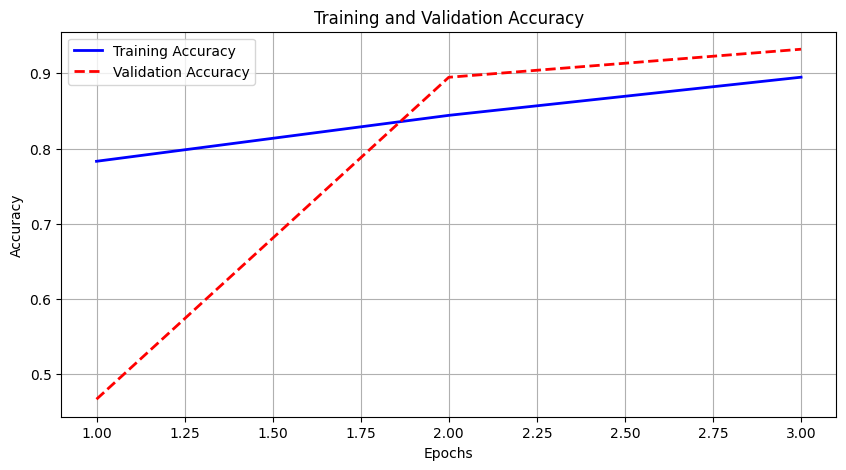

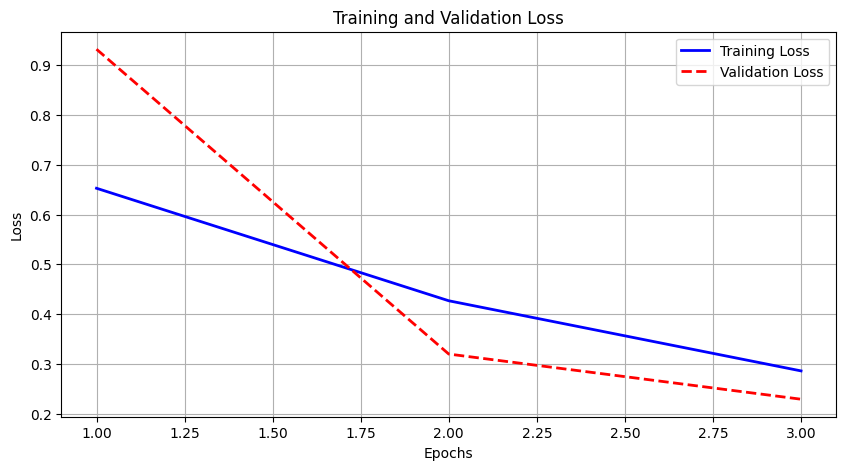

In [ ]:
import pickle

# Load the training history
with open("/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/training_history.pkl", 'rb') as file:
    history_dict = pickle.load(file)

# Assign the loaded history to `history.history` for compatibility with plot_graphs4vali
history = type('History', (object,), {})()  # Create a mock object to store the history
history.history = history_dict

# Usage example: plot graphs using saved history data
# Assuming you've loaded your saved history data into history_dict
plot_graphs4vali(history_dict)


Test the performance of the model

In [ ]:
from tensorflow import keras

# Path to the .h5 model file
model_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/senior_project_model.h5"

# Load the model from the .h5 file
test_model = keras.models.load_model(model_path)

# Assuming test_dataset is already defined and is a tf.data.Dataset object
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 0.9232 - loss: 0.2041
Test accuracy: 0.927
Test loss: 0.212


## Record Data

We now record the data into a csv, to keep track of the performance of the model under the different conditions and established parameters

In [ ]:
import csv
from datetime import datetime
import time
import os

def log_performance_to_csv(model, history, test_dataset, csv_file_path):
    # Test the model on the test dataset
    test_loss, test_accuracy = model.evaluate(test_dataset)

    # Get model configuration details
    num_conditions_forecasted = model.output_shape[-1]
    num_layers = len(model.layers)
    num_parameters = model.count_params()
    learning_rate = model.optimizer.learning_rate.numpy()
    epochs = len(history.history['accuracy'])

    # Get final metrics from training history
    training_accuracy = history.history["accuracy"][-1]
    val_accuracy = history.history["val_accuracy"][-1]
    training_loss = history.history["loss"][-1]
    val_loss = history.history["val_loss"][-1]

    # Calculate execution time if desired
    execution_time = "N/A"  # Set your own execution time if you have it recorded separately

    # Create data row for CSV
    data_row = {
        "Date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Model Name/Version": "Senior_Project_Model_v1",
        "Number of Conditions Forecasted": num_conditions_forecasted,
        "Number of Layers": num_layers,
        "Number of Parameters": num_parameters,
        "Learning Rate": learning_rate,
        "Epochs": epochs,
        "Training Accuracy": training_accuracy,
        "Validation Accuracy": val_accuracy,
        "Testing Accuracy": test_accuracy,
        "Training Loss": training_loss,
        "Validation Loss": val_loss,
        "Testing Loss": test_loss,
        "Execution Time": execution_time,
        "Notes": "Initial experiment run with default settings"
    }

    # Write data row to CSV
    file_exists = os.path.isfile(csv_file_path)
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=data_row.keys())
        if not file_exists:
            writer.writeheader()  # Write headers if file doesn't exist
        writer.writerow(data_row)

    print(f"Model performance logged to {csv_file_path}")

# Usage example
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/model_performance_log.csv"
log_performance_to_csv(test_model, history, test_dataset, csv_file_path)


46/46 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9232 - loss: 0.2041
Model performance logged to /content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/model_performance_log.csv


- Display confussion matrix to visualize model performance

46/46 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step


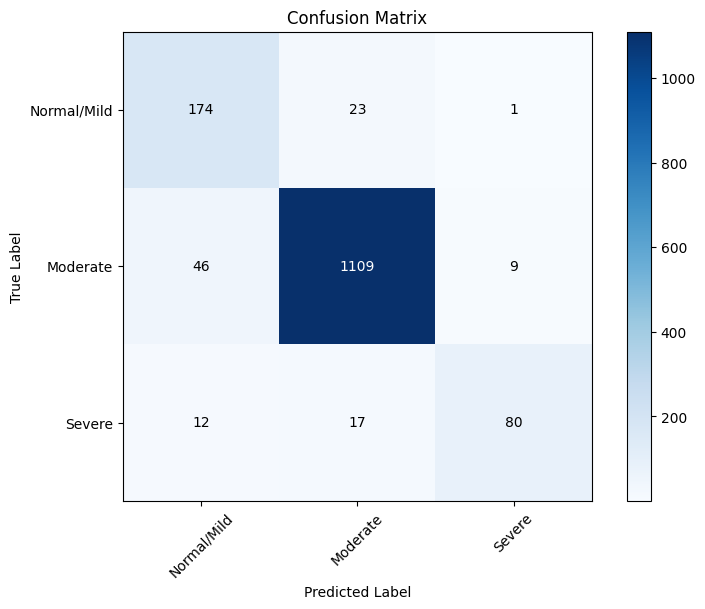

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the best performing model
best_model = test_model

# Make predictions on the test set
y_pred_probs = best_model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Get true labels from the test set
y_true = []
for _, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Normal/Mild', 'Moderate', 'Severe']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Run the model with some external data

- We now will execute the model predicting the patients condition on some external data, to validate what is the performance of the model without using the established dataset

In [ ]:
# Directories
train_labels_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/train.csv"
train_series_description_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/train_series_descriptions.csv"

In [ ]:
import tensorflow as tf

# We will try to use a random picture from our dataset to prove that it works

test_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/senior_project_model.h5")

In [ ]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Define your input and output directories
# Put the folder of the patient that you want to try in the dicom_images folder, and prior to that delete every file from each of the folders
image_to_test_dcm = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/images_to_test/dicom_images"
image_to_test_png = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/images_to_test/png_images"

# Function to convert DICOM to PNG
def convert_dcm_to_png(dcm_path, output_path):
    # Read the DICOM file
    dcm = pydicom.dcmread(dcm_path)
    # Extract pixel data from the DICOM file
    img_array = dcm.pixel_array
    # Normalize and save as PNG
    plt.imsave(output_path, img_array, cmap='gray')

# Traverse the patient folders and subfolders to find all DICOM files
for patient_folder in os.listdir(image_to_test_dcm):
    patient_folder_path = os.path.join(image_to_test_dcm, patient_folder)

    # Check if it's a directory
    if os.path.isdir(patient_folder_path):
        for angle_folder in os.listdir(patient_folder_path):
            angle_folder_path = os.path.join(patient_folder_path, angle_folder)

            # Check if it's a directory
            if os.path.isdir(angle_folder_path):
                for dcm_file in os.listdir(angle_folder_path):
                    if dcm_file.endswith('.dcm'):
                        # Construct the full DICOM file path
                        dcm_path = os.path.join(angle_folder_path, dcm_file)

                        # Create a name for the output PNG file
                        picture_number = os.path.splitext(dcm_file)[0]  # Remove .dcm extension
                        output_filename = f"{patient_folder}_{angle_folder}_{picture_number}.png"
                        output_path = os.path.join(image_to_test_png, output_filename)

                        # Convert the DICOM to PNG
                        convert_dcm_to_png(dcm_path, output_path)

print("Conversion complete!")

Conversion complete!


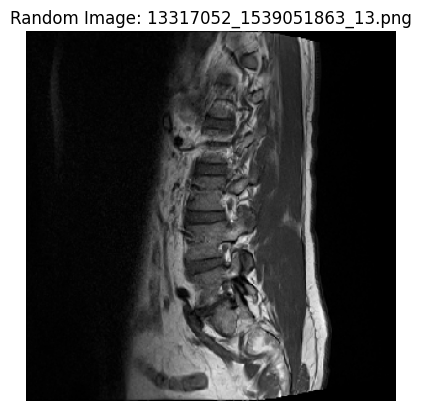

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Predicted class for 13317052_1539051863_13.png: Normal/Mild, Numerical: 1


In [ ]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Choose a random PNG image from the folder
random_image_file = random.choice([f for f in os.listdir(image_to_test_png) if f.endswith('.png')])
random_image_path = os.path.join(image_to_test_png, random_image_file)

# Step 2: Load and preprocess the selected image
img = image.load_img(random_image_path, target_size=(300, 300))  # Adjust the target_size based on your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape (batch size, height, width, channels)

# Normalize the image data (assuming your model expects values between 0 and 1)
img_array /= 255.0  # Adjust based on how your model was trained

# Step 3: Display the random image
plt.imshow(img)
plt.title(f"Random Image: {random_image_file}")
plt.axis('off')
plt.show()

# Step 4: Make a prediction using the model
predictions = test_model.predict(img_array)

# Assuming the model outputs probabilities for each class, we can get the predicted class index
predicted_class = np.argmax(predictions[0]) # Modify based on your model's output shape

# Define a mapping for numerical labels to class names
label_mapping = {1: 'Normal/Mild', 2: 'Moderate', 3: 'Severe'}
reverse_mapping = {'Normal/Mild': 1, 'Moderate': 2, 'Severe': 3}  # reverse to match predictions to csv

# Step 5: Print the predicted class
print(f"Predicted class for {random_image_file}: {label_mapping[predicted_class]}, Numerical: {predicted_class}")


- We obtained a random picture out of our dataset.
- Now, we will try to point where the condition state is located and its severity with a visual tool

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

def get_img_array(img_path, size):
    # Load image and preprocess it
    img = image.load_img(img_path, target_size=size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale if necessary
    return img_array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the model output
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Get the gradients of the predicted class for the specified output layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)

        # Choose the class index to generate Grad-CAM for, defaulting to the predicted class
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the chosen class
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients over all axes except the channel axis
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by "how important this channel is" and sum
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    # Load original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize heatmap to image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    # Apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    # Display the image
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Load model and image
model_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/senior_project_model.h5"
model = load_model(model_path)
img_path = random_image_path
img_array = get_img_array(img_path, size=(300, 300))

# Use the last convolutional layer in the model
last_conv_layer_name = "conv2d_4"  # Adjust this to the name of the last conv layer in your model

# Generate the heatmap for the severe class (pred_index=2), or leave pred_index=None for predicted class
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None)

# Display the heatmap over the image
save_and_display_gradcam(img_path, heatmap)


TypeError: list indices must be integers or slices, not tuple

- In the following piece of code, we will work on evaluating the model performance on the real examples.

In [ ]:
import pandas as pd
train_labels_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/rsna-2024-lumbar-spine-degenerative-classification/train.csv"
df = pd.read_csv(train_labels_path)
df.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [ ]:
# Extract study_id from the image filename
# Assuming the file naming convention is "study_id_series_id.png"
study_id, series_id = random_image_file.split('_')[0], random_image_file.split('_')[1].replace('.png', '')

# Step 2: Find the row in the CSV file that matches the patient_id and series_id
matching_row = df[(df['study_id'] == int(study_id))]

if matching_row.empty:
    print(f"No data found for study_id: {study_id}")
else:
    # Extract the value for the "spinal_canal_stenosis_l3_l4" column
    spinal_canal_stenosis_l3_l4_value = matching_row['spinal_canal_stenosis_l3_l4'].values[0]

    print(f"Patient {study_id}, Spinal Canal Stenosis (L3-L4): {spinal_canal_stenosis_l3_l4_value}")

    # You can now compare the result from the model's prediction with this value

Patient 13317052, Spinal Canal Stenosis (L3-L4): Normal/Mild


In [ ]:
# Check if the model predicted correctly

if spinal_canal_stenosis_l3_l4_value == label_mapping[predicted_class]:
    print("The model predicted correctly!")
else:
    print("The model predicted incorrectly")

The model predicted correctly!


In [ ]:
#Simulation

# Variables to store results
correct_predictions = 0
total_predictions = 100

# Loop 100 times for the simulation
for i in range(total_predictions):
    # Step 1: Choose a random PNG image from the folder
    random_image_file = random.choice([f for f in os.listdir(image_to_test_png) if f.endswith('.png')])
    random_image_path = os.path.join(image_to_test_png, random_image_file)

    # Step 2: Load and preprocess the selected image
    img = image.load_img(random_image_path, target_size=(300, 300))  # Adjust based on your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape (batch size, height, width, channels)

    # Normalize the image data (assuming your model expects values between 0 and 1)
    img_array /= 255.0  # Adjust based on how your model was trained

    # Step 4: Make a prediction using the model
    predictions = test_model.predict(img_array)

    # Get the predicted class index
    predicted_class_idx = np.argmax(predictions[0]) + 1  # Adjust based on your model's output shape

    # Step 5: Extract study_id from the image filename
    study_id = random_image_file.split('_')[0]

    # Step 6: Find the matching row in the CSV file based on the study_id
    matching_row = df[df['study_id'] == int(study_id)]

    if not matching_row.empty:
        # Extract the actual label for 'spinal_canal_stenosis_l3_l4'
        spinal_canal_stenosis_l3_l4_value = matching_row['spinal_canal_stenosis_l3_l4'].values[0]
        actual_class_idx = reverse_mapping[spinal_canal_stenosis_l3_l4_value]  # Map actual label to numerical

        # Compare the predicted class with the actual value
        if predicted_class_idx == actual_class_idx:
            correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions * 100

# Display the accuracy
print(f"Manual Accuracy after {total_predictions} iterations: {accuracy}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms